## Calculate GPP from NIRv

In this notebook, previously calculated monthly NIRv is compared to downloaded MODIS and VODCA2 GPP time series. Then, a GPP time series is calculated from NIRv values by establishing a relation to MODIS GPP.

In [3]:
# import libraries
import glob
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns

In [4]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [ ]:
# get spatial means for Germany for NIRv
# first, get values for broadleaved forest
# load all monthly gpp values as one dataset
directory = f"./NIRv/Monthly"
filelist = glob.glob(os.path.join(directory, "*BL*.nc"))
nirv_monthly_BL = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [4]:
# now, the same for needleleaved forest
# load all monthly gpp values as one dataset
directory = f"./NIRv/Monthly"
filelist = glob.glob(os.path.join(directory, "*NL*.nc"))
nirv_monthly_NL = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

In [5]:
# calculate mean NIRv values per month for Germany
nirv_monthly_spatial_means_BL = nirv_monthly_BL.mean(['lon','lat'], skipna=True).to_dataframe()
nirv_monthly_spatial_means_NL = nirv_monthly_NL.mean(['lon','lat'], skipna=True).to_dataframe()
nirv_monthly_spatial_means_BL

,NIRv,crs,spatial_ref
time,,,
1981-06-01,0.174200,0,0
1981-07-01,0.152914,0,0
1981-08-01,0.113898,0,0
1981-09-01,0.119536,0,0
1981-10-01,0.084218,0,0
...,...,...,...
2024-08-01,0.240347,-127,0
2024-09-01,0.216595,-127,0
2024-10-01,0.155714,-127,0


In [6]:
# drop unneeded columns
nirv_monthly_spatial_means_BL = nirv_monthly_spatial_means_BL.drop(['crs', 'spatial_ref'], axis=1)
nirv_monthly_spatial_means_NL = nirv_monthly_spatial_means_NL.drop(['crs', 'spatial_ref'], axis=1)

In [7]:
# rename column with gpp value to show area
nirv_monthly_spatial_means_BL.rename({"NIRv":"GER"}, axis=1, inplace=True)
nirv_monthly_spatial_means_NL.rename({"NIRv":"GER"}, axis=1, inplace=True)

In [8]:
# turn index with time values into column
nirv_monthly_spatial_means_BL = nirv_monthly_spatial_means_BL.reset_index()
nirv_monthly_spatial_means_NL = nirv_monthly_spatial_means_NL.reset_index()

In [9]:
# save spatial means as csv dataset
nirv_monthly_spatial_means_BL.to_csv("./Tables/Spatial_Means/NIRv_Monthly_Spatial_Means_BL.csv")
nirv_monthly_spatial_means_NL.to_csv("./Tables/Spatial_Means/NIRv_Monthly_Spatial_Means_NL.csv")

In [13]:
# load datasets
nirv_monthly_spatial_means_BL = pd.read_csv("./Tables/Spatial_Means/NIRv_Monthly_Spatial_Means_BL.csv", index_col = 0)
nirv_monthly_spatial_means_NL = pd.read_csv("./Tables/Spatial_Means/NIRv_Monthly_Spatial_Means_NL.csv", index_col = 0)

In [14]:
# convert the time values to pandas datetime
nirv_monthly_spatial_means_BL["time"] = pd.to_datetime(nirv_monthly_spatial_means_BL["time"])
nirv_monthly_spatial_means_NL["time"] = pd.to_datetime(nirv_monthly_spatial_means_NL["time"])

In [15]:
nirv_monthly_spatial_means_BL

,time,GER
0,1981-06-01,0.174200
1,1981-07-01,0.152914
2,1981-08-01,0.113898
3,1981-09-01,0.119536
4,1981-10-01,0.084218
...,...,...
517,2024-08-01,0.240347
518,2024-09-01,0.216595
519,2024-10-01,0.155714
520,2024-11-01,0.103326


In [16]:
# load spatial means for Germany for MODIS and VOCDCA2 GPP
gpp_modis_BL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_BL.csv")
gpp_modis_NL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_NL.csv")
gpp_vodca_BL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_BL.csv")
gpp_vodca_NL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_NL.csv")

In [17]:
# convert the time values to pandas datetime
gpp_modis_BL["time"] = pd.to_datetime(gpp_modis_BL["time"])
gpp_modis_NL["time"] = pd.to_datetime(gpp_modis_NL["time"])
gpp_vodca_BL["time"] = pd.to_datetime(gpp_vodca_BL["time"])
gpp_vodca_NL["time"] = pd.to_datetime(gpp_vodca_NL["time"])

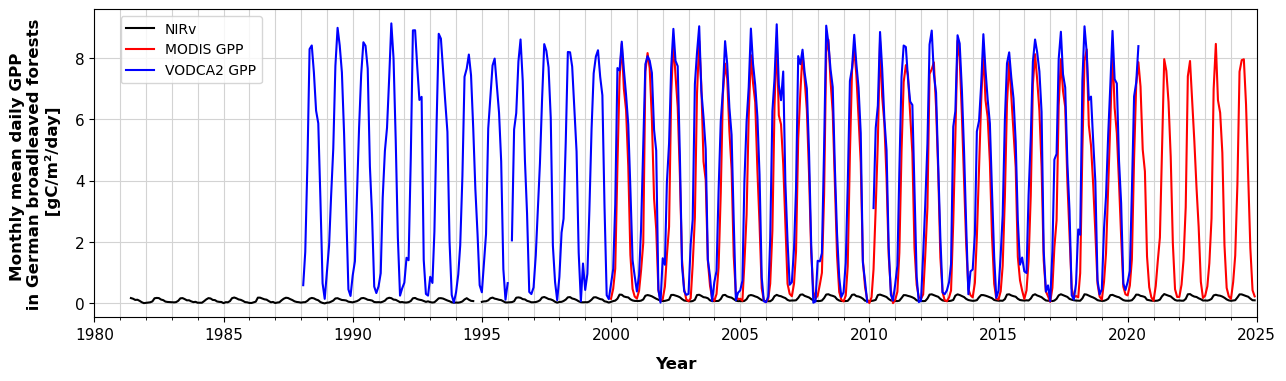

In [18]:
# plot spatial means for BL forest
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'GER', data=nirv_monthly_spatial_means_BL, color='black', linewidth=1.5, linestyle='-', label="NIRv")
ax.plot('time', 'GER', data=gpp_modis_BL, color='red', linewidth=1.5, linestyle='-', label="MODIS GPP")
ax.plot('time', 'GER', data=gpp_vodca_BL, color='blue', linewidth=1.5, linestyle='-', label="VODCA2 GPP")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German broadleaved forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.15, 1), ncol = 1)

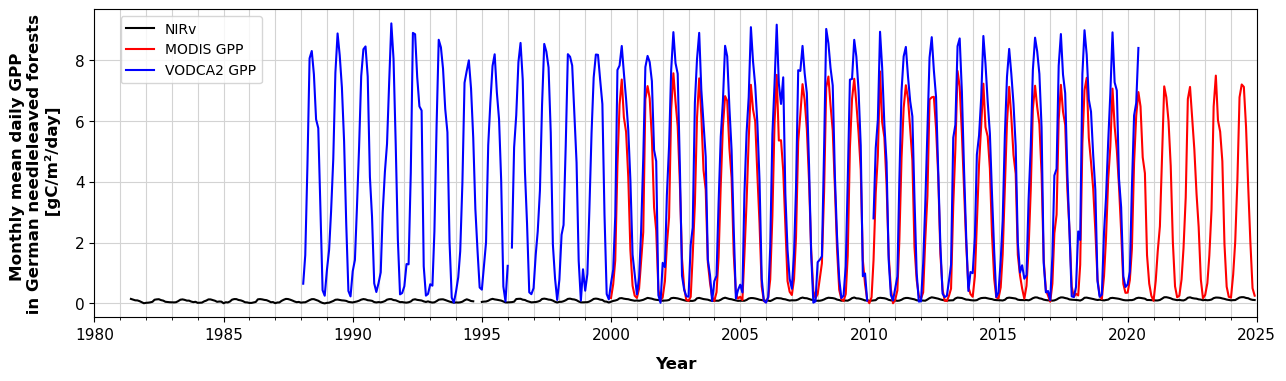

In [19]:
# plot spatial means for NL forest
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'GER', data=nirv_monthly_spatial_means_NL, color='black', linewidth=1.5, linestyle='-', label="NIRv")
ax.plot('time', 'GER', data=gpp_modis_NL, color='red', linewidth=1.5, linestyle='-', label="MODIS GPP")
ax.plot('time', 'GER', data=gpp_vodca_NL, color='blue', linewidth=1.5, linestyle='-', label="VODCA2 GPP")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German needleleaved forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(0.15, 1), ncol = 1)

In [20]:
# merge datasets into one dataframe with common time values to create scatterplots
df_nirv_modis_BL = pd.merge(
    nirv_monthly_spatial_means_BL[['time', 'GER']],
    gpp_modis_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)
df_nirv_modis_BL

,time,NIRv,MODIS GPP
0,2000-02-01,0.074901,0.480098
1,2000-03-01,0.090748,1.134153
2,2000-04-01,0.152040,4.493022
3,2000-05-01,0.286408,7.337403
4,2000-06-01,0.281401,8.465317
...,...,...,...
294,2024-08-01,0.240347,6.482536
295,2024-09-01,0.216595,4.049793
296,2024-10-01,0.155714,1.796794
297,2024-11-01,0.103326,0.428716


In [21]:
df_nirv_modis_NL = pd.merge(
    nirv_monthly_spatial_means_NL[['time', 'GER']],
    gpp_modis_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)

In [22]:
df_nirv_vodca_BL = pd.merge(
    nirv_monthly_spatial_means_BL[['time', 'GER']],
    gpp_vodca_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

In [23]:
df_nirv_vodca_NL = pd.merge(
    nirv_monthly_spatial_means_NL[['time', 'GER']],
    gpp_vodca_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

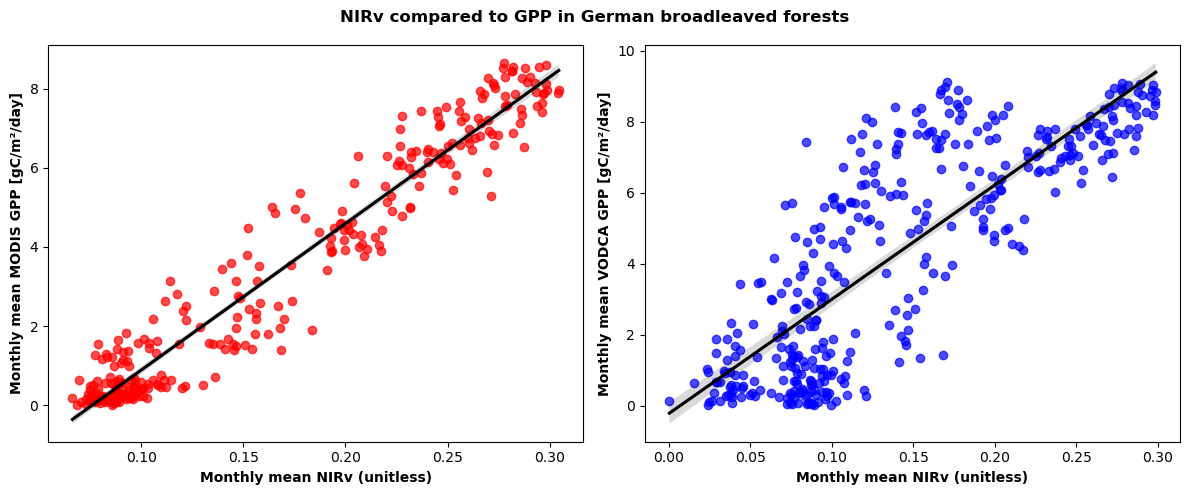

In [24]:
# create scatterplots for BL forest
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# NIRv vs MODIS
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_BL, ax = ax1, scatter_kws={"alpha":0.7, "color":"red"}, line_kws={"color":"black"})
ax1.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax1.set_ylabel('Monthly mean MODIS GPP [gC/m²/day]', weight = "bold")

# NIRv vs VODCA
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_BL, ax = ax2, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax2.set_ylabel('Monthly mean VODCA GPP [gC/m²/day]', weight = "bold")

plt.suptitle("NIRv compared to GPP in German broadleaved forests", weight = "bold")
plt.tight_layout()
plt.show()

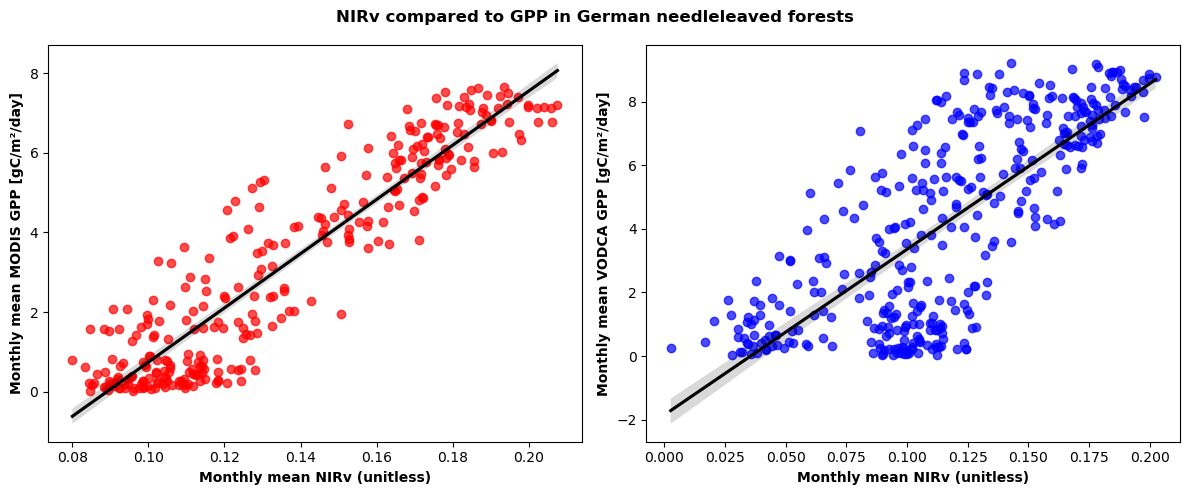

In [25]:
# create scatterplots for NL forest
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# NIRv vs MODIS
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_NL, ax = ax1, scatter_kws={"alpha":0.7, "color":"red"}, line_kws={"color":"black"})
ax1.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax1.set_ylabel('Monthly mean MODIS GPP [gC/m²/day]', weight = "bold")

# NIRv vs VODCA
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_NL, ax = ax2, scatter_kws={"alpha":0.7, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('Monthly mean NIRv (unitless)', weight = "bold")
ax2.set_ylabel('Monthly mean VODCA GPP [gC/m²/day]', weight = "bold")

plt.suptitle("NIRv compared to GPP in German needleleaved forests", weight = "bold")
plt.tight_layout()
plt.show()

In [26]:
# apply equation to NIRv dataset to calculate GPP
df_nirv_modis_BL["NIRv GPP"] = (df_nirv_modis_BL["NIRv"] - 0.1664) * 36 + 3.357
df_nirv_modis_NL["NIRv GPP"] = (df_nirv_modis_NL["NIRv"] - 0.1357) * 66 + 3.1843

In [27]:
# see if means of GPP time series match
print(f"Mean of the MODIS GPP time series (BL forest): {df_nirv_modis_BL["MODIS GPP"].mean()}")
print(f"Mean of the NIRv GPP time series (BL forest): {df_nirv_modis_BL["NIRv GPP"].mean()}")
print(f"Mean of the MODIS GPP time series (NL forest): {df_nirv_modis_NL["MODIS GPP"].mean()}")
print(f"Mean of the NIRv GPP time series (NL forest): {df_nirv_modis_NL["NIRv GPP"].mean()}")

Mean of the MODIS GPP time series (BL forest): 3.3677629479313205
Mean of the NIRv GPP time series (BL forest): 3.3748098852389035
Mean of the MODIS GPP time series (NL forest): 3.194330000360419
Mean of the NIRv GPP time series (NL forest): 3.204494243567612


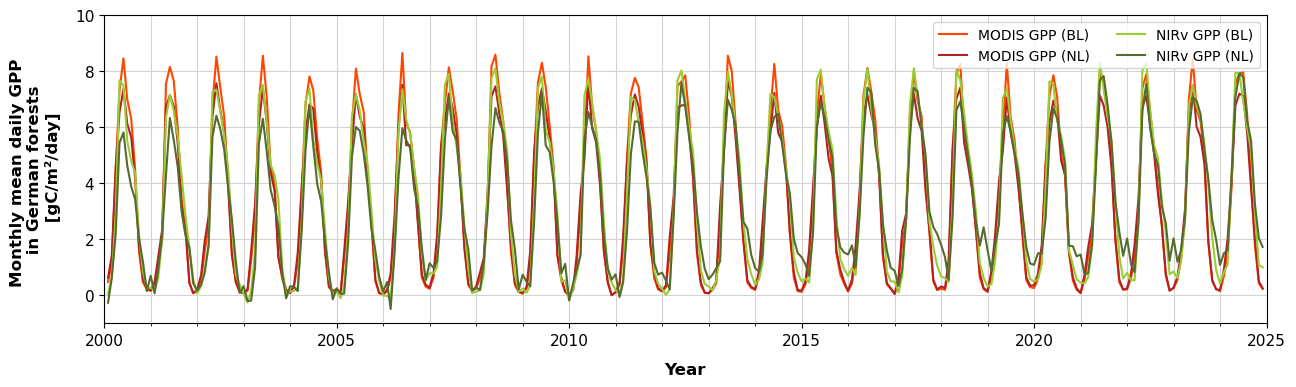

In [31]:
# plot result
fig, ax = plt.subplots(figsize=(15,4))
ax.plot('time', 'MODIS GPP', data=df_nirv_modis_BL, color='orangered', linewidth=1.5, linestyle='-', label="MODIS GPP (BL)")
ax.plot('time', 'MODIS GPP', data=df_nirv_modis_NL, color='firebrick', linewidth=1.5, linestyle='-', label="MODIS GPP (NL)")
ax.plot('time', 'NIRv GPP', data=df_nirv_modis_BL, color='yellowgreen', linewidth=1.5, linestyle='-', label="NIRv GPP (BL)")
ax.plot('time', 'NIRv GPP', data=df_nirv_modis_NL, color='darkolivegreen', linewidth=1.5, linestyle='-', label="NIRv GPP (NL)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=11)
ax.set_ylabel('Monthly mean daily GPP \n in German forests \n [gC/m²/day]', fontsize=12, weight='bold', labelpad=10)
ax.set_xlabel('Year', fontsize=12, weight='bold', labelpad=10)
ax.set_xlim(datetime(2000, 1, 1), datetime(2025, 1, 1))
ax.set_ylim(-1, 10)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=1, fontsize=10,  bbox_to_anchor=(1, 1), ncol = 2)

In [42]:
# apply equation to all monthly NIRv datasets to calculate GPP for all pixels from 1981 - 2024
# process year-wise
# begin with broadleaved forest

for year in range (1981, 2025):

    # open monthly NIRv dataset of according year
    nirv = xr.open_dataset(f"./NIRv/Monthly/NIRv_mon_mean_{year}_BL.nc")

    # calculate GPP from NIRv 
    gpp = ((nirv - 0.1664) * 36 + 3.357).rename({"NIRv": "GPP"})

    # add unit to variable attributes
    gpp.GPP.attrs["units"] = "monthly mean of gC/m²/day"

    # compress data to reduce size
    comp = dict(zlib=True, complevel=4)
    gpp.GPP.encoding.update(comp)

    # save created datasets as netCDF4 files
    gpp.to_netcdf(f"./GPP/GPP_NIRv/Monthly/GPP_mon_mean_{year}_BL.nc")

In [43]:
# look at exemplary data
gpp

<xarray.Dataset> Size: 995MB
Dimensions:      (lon: 3510, lat: 2952, time: 12)
Coordinates:
    crs          int8 1B ...
    spatial_ref  int64 8B ...
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0
  * time         (time) datetime64[ns] 96B 2024-01-01 2024-02-01 ... 2024-12-01
Data variables:
    GPP          (time, lat, lon) float64 995MB nan nan nan nan ... nan nan nan

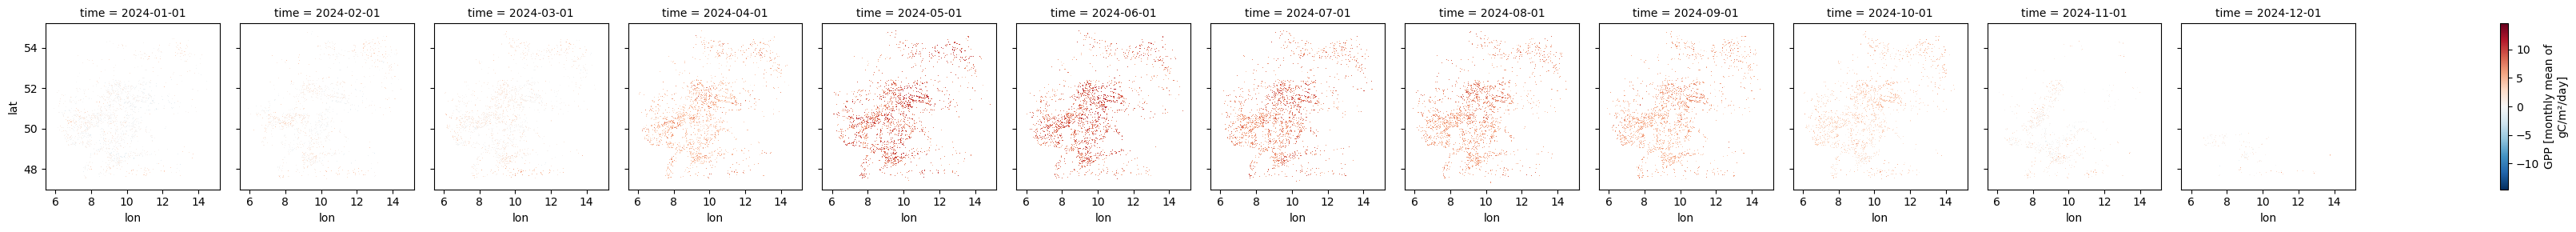

In [44]:
gpp.GPP.sel(time = slice('2024-01', '2024-12')).plot(col="time")

In [45]:
# continue with needleleaved forest

for year in range (1981, 2025):

    # open monthly NIRv dataset of according year
    nirv = xr.open_dataset(f"./NIRv/Monthly/NIRv_mon_mean_{year}_NL.nc")

    # calculate GPP from NIRv 
    gpp = ((nirv - 0.1357) * 66 + 3.1843).rename({"NIRv": "GPP"})

    # add unit to variable attributes
    gpp.GPP.attrs["units"] = "monthly mean of gC/m²/day"

    # compress data to reduce size
    comp = dict(zlib=True, complevel=4)
    gpp.GPP.encoding.update(comp)

    # save created datasets as netCDF4 files
    gpp.to_netcdf(f"./GPP/GPP_NIRv/Monthly/GPP_mon_mean_{year}_NL.nc")

In [6]:
# look at exemplary data
gpp = xr.open_dataset("./GPP/GPP_NIRv/Monthly/GPP_mon_mean_2024_NL.nc")
gpp

<xarray.Dataset> Size: 995MB
Dimensions:      (lon: 3510, lat: 2952, time: 12)
Coordinates:
    crs          int8 1B ...
    spatial_ref  int64 8B ...
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0
  * time         (time) datetime64[ns] 96B 2024-01-01 2024-02-01 ... 2024-12-01
Data variables:
    GPP          (time, lat, lon) float64 995MB ...

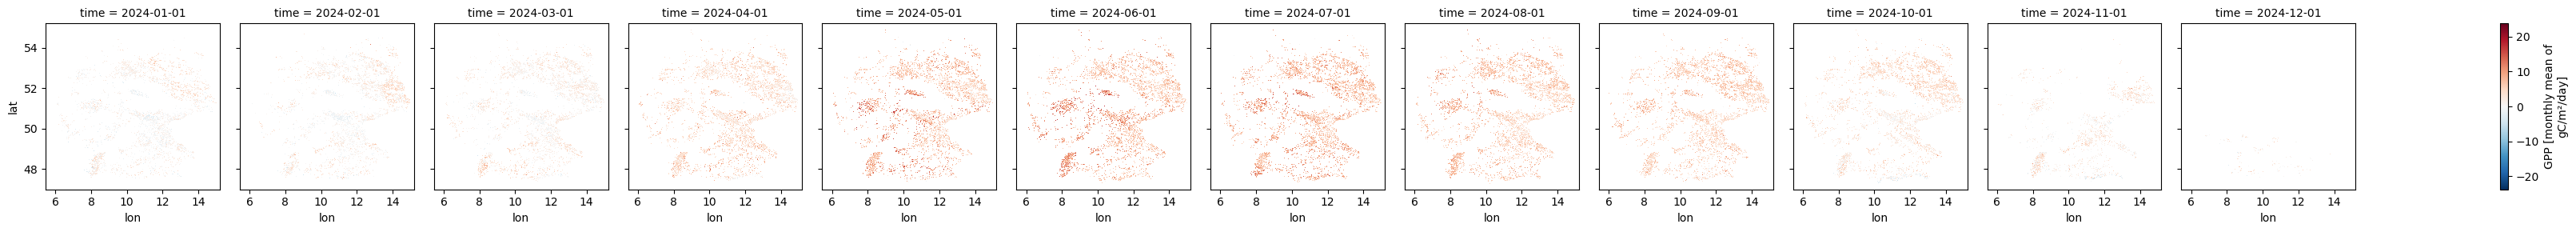

In [7]:
gpp.GPP.sel(time = slice('2024-01', '2024-12')).plot(col="time")